Dataset Columns: ['Date-Hour(NMT)', 'WindSpeed', 'Sunshine', 'AirPressure', 'Radiation', 'AirTemperature', 'RelativeAirHumidity', 'SystemProduction']
Available Columns: ['AirTemperature', 'SystemProduction']


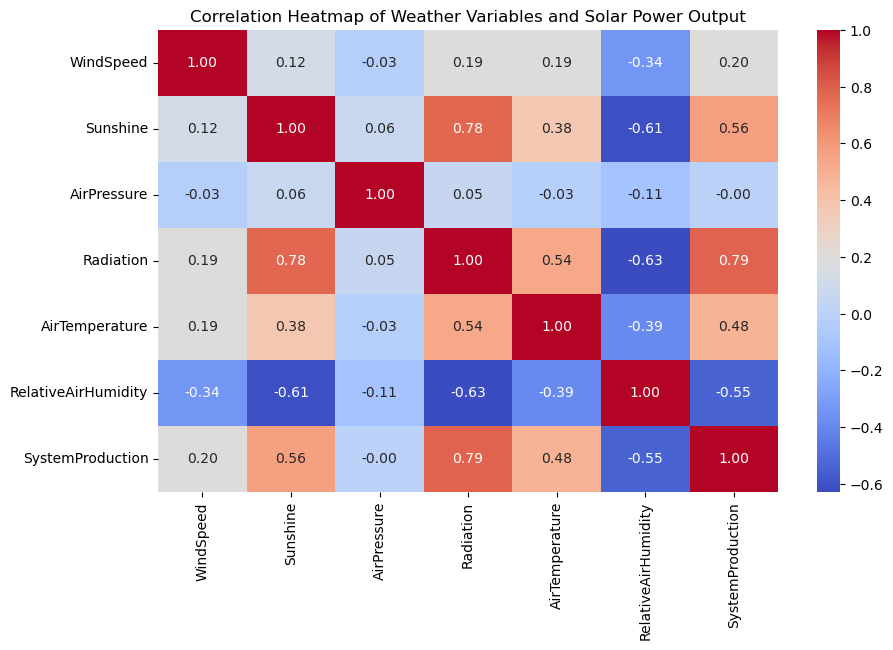

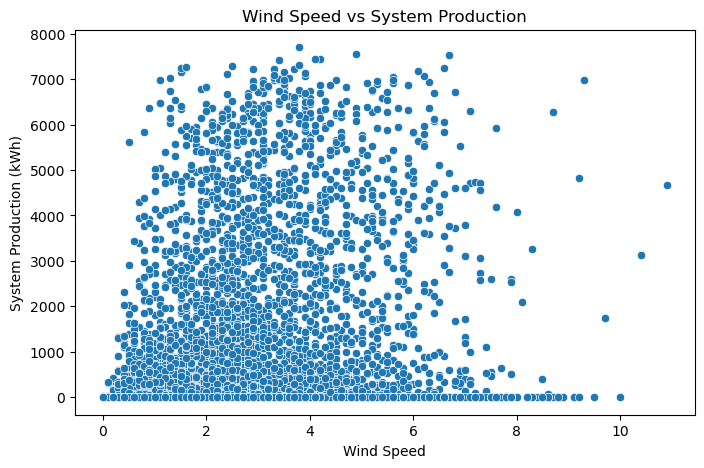

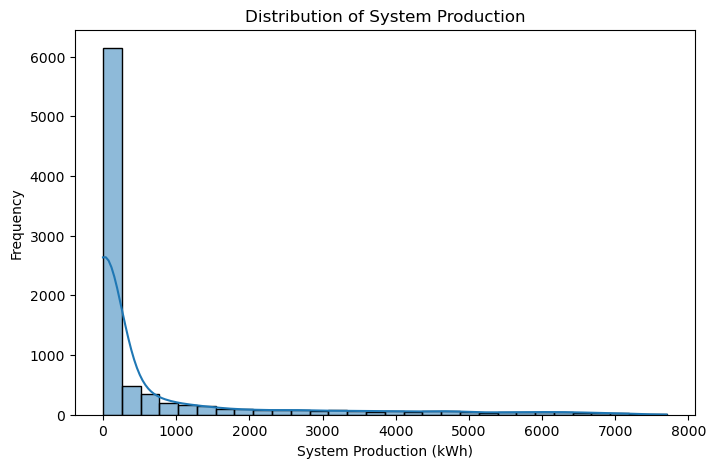

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Solar Power Plant Data.csv")

# Debug: Print column names
print("Dataset Columns:", df.columns.tolist())

# Remove leading/trailing spaces in column names
df.columns = df.columns.str.strip()

# Check correct column names
expected_columns = ['AirTemperature', 'SystemProduction']
actual_columns = [col for col in df.columns if col in expected_columns]
print("Available Columns:", actual_columns)

# Drop missing values only for available columns
df = df.dropna(subset=actual_columns)

# Select only numeric columns
df_numeric = df.select_dtypes(include=['number'])

# Compute correlation matrix
correlation_matrix = df_numeric.corr()

# Heatmap Visualization
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Weather Variables and Solar Power Output")
plt.show()

if 'WindSpeed' in df_numeric.columns and 'SystemProduction' in df_numeric.columns:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=df_numeric['WindSpeed'], y=df_numeric['SystemProduction'])
    plt.xlabel("Wind Speed")
    plt.ylabel("System Production (kWh)")
    plt.title("Wind Speed vs System Production")
    plt.show()
else:
    print("Scatter plot skipped: Required columns missing.")

# Histogram of System Production
if 'SystemProduction' in df_numeric.columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df_numeric['SystemProduction'], bins=30, kde=True)
    plt.xlabel("System Production (kWh)")
    plt.ylabel("Frequency")
    plt.title("Distribution of System Production")
    plt.show()
else:
    print("Histogram skipped: 'SystemProduction' column missing.")